# Split Apply Combine apllied

In [1]:
import pandas as pd

In [2]:
summer = pd.read_csv("../Course_Materials_Part2/Video_Lecture_NBs/summer.csv")

In [3]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [9]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [19]:
# o método nlargest só funciona se o objeto não for um DataFrame, tem que ser um DataSerie
medals_per_country = summer.groupby("Country").Medal.count().nlargest(n=20)

In [21]:
medals_per_country

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

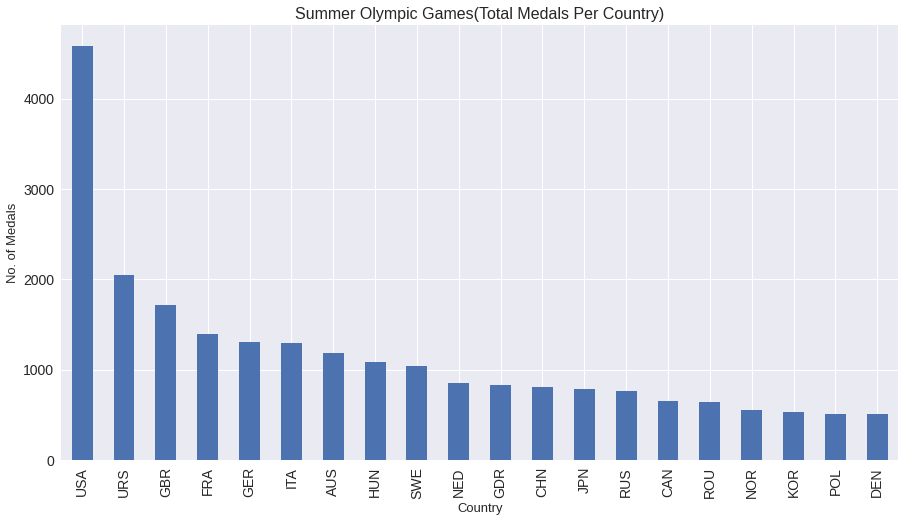

In [23]:
medals_per_country.plot(kind="bar", figsize = (15,8), fontsize = 14)
plt.xlabel("Country", fontsize=13)
plt.ylabel("No. of Medals", fontsize=13)
plt.title("Summer Olympic Games(Total Medals Per Country)", fontsize=16)
plt.show()

In [24]:
tit = pd.read_csv("../Course_Materials_Part2/Video_Lecture_NBs/titanic.csv")

In [26]:
tit.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
tit.fare.mean()

32.2042079685746

In [29]:
tit["fare"].mean()

32.2042079685746

In [31]:
tit.groupby("pclass")[["fare"]].mean()

,fare
pclass,
1,84.154687
2,20.662183
3,13.675550


In [32]:
tit.survived.sum()

342

In [33]:
tit.survived.mean()

0.3838383838383838

In [35]:
tit.groupby("sex")[["survived"]].mean()

,survived
sex,
female,0.742038
male,0.188908


In [36]:
tit.groupby("pclass")[["survived"]].mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [37]:
tit["ad_chi"] = "adult"

In [38]:
tit.loc[tit.age < 18, "ad_chi"] = "child"

In [39]:
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult


In [43]:
tit.ad_chi.value_counts()

adult    778
child    113
Name: ad_chi, dtype: int64

In [44]:
tit.groupby("ad_chi").survived.mean()

ad_chi
adult    0.361183
child    0.539823
Name: survived, dtype: float64

In [45]:
tit.groupby(["sex", "ad_chi"]).survived.count()

sex     ad_chi
female  adult     259
        child      55
male    adult     519
        child      58
Name: survived, dtype: int64

In [47]:
tit.groupby(["sex", "ad_chi"]).survived.mean().sort_values(ascending=False)

sex     ad_chi
female  adult     0.752896
        child     0.690909
male    child     0.396552
        adult     0.165703
Name: survived, dtype: float64

In [48]:
w_and_c_first = tit.groupby(["sex", "ad_chi"]).survived.mean().sort_values(ascending=False)

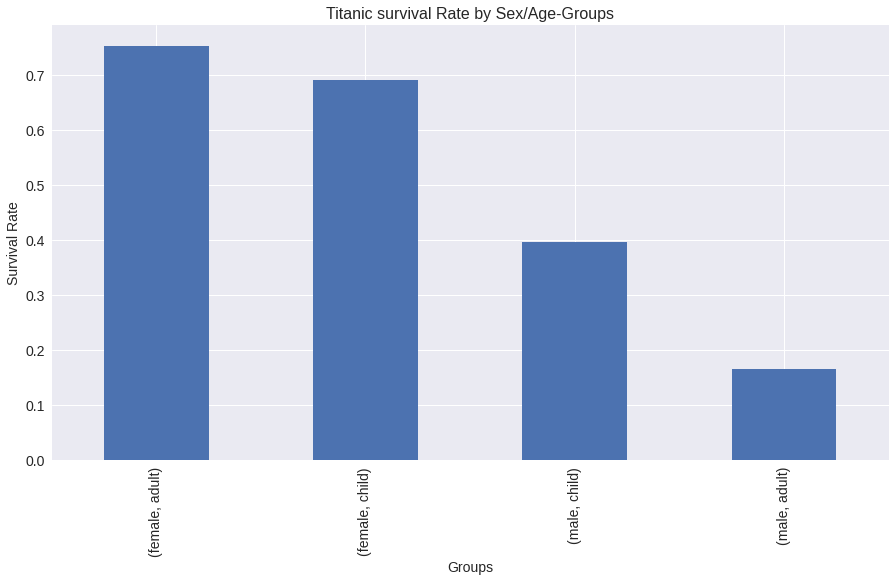

In [51]:
w_and_c_first.plot(kind="bar", figsize=(15,8), fontsize=14)
plt.xlabel("Groups", fontsize=14)                   
plt.ylabel("Survival Rate", fontsize=14)                                      
plt.title("Titanic survival Rate by Sex/Age-Groups", fontsize=16)                   
plt.show()                   